In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cdasws import CdasWs
import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cdas = CdasWs()

nT_to_T = 1e-9
per_cmCubic_to_per_mCubic = 1e6
mu_0 = 4*np.pi*1e-7
m_proton = 1.6726219*1e-27
eV_to_Kelvin = 11604.5250061598
R_earth = 6371

In [16]:
def my_nanmean(arr):
    notNanLength = np.sum(1-np.isnan(arr))
    if notNanLength == 0:
        return np.nan
    else:
        return np.nansum(arr) / notNanLength
my_nanmean(np.array([np.nan,np.nan]))
my_nanmean(np.array([np.nan,1,2,3]))

nan

2.0

In [2]:
selected_events = pd.read_pickle('selected_events.pkl')

In [28]:
selected_events[:2]

,start,end,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,...,O7toO6_ratio_SWI,Q_avg_Fe_SWI,SW_type_SWI,B_total_WIND,B_total_ACE,V_proton_x_GSE_3DP,B_azimuthal_angle_WIND,V_proton_y_GSE_3DP,V_proton_z_GSE_3DP,FetoO
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879,0.271215,224.82663,6.513060,0.010688,2.350267,...,0.25949,13.932,0.0,7.752589,6.153875,-223.506460,113.044482,2.880479,6.833833,NaN
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857,0.305054,224.82663,6.770442,0.004693,3.988924,...,NaN,NaN,3.0,8.528295,8.663857,-281.049361,131.376042,-57.536484,11.326748,NaN


In [43]:
selected_events.to_pickle('selected_events.pkl')
selected_events.to_csv('selected_events.csv')
# use it if necessary.
# after using please comment out.

In [29]:
initialize = True
if initialize:
#     selected_events['FetoO'] = [np.nan,]*len(selected_events)
#     selected_events['V_proton_y_GSE_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['V_proton_z_GSE_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['B_azimuthal_angle_WIND'] = [np.nan,]*len(selected_events) 
#     selected_events['V_proton_x_GSE_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_speed_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['proton_temperature_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_density_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_speed_3DP'] = [np.nan,]*len(selected_events)
#     selected_events['electron_temperature_3DP'] = [np.nan,]*len(selected_events)
#     
#     selected_events['x_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['y_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['z_GSE_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['x_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['y_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['z_GSE_ACE'] = [np.nan,]*len(selected_events)
#     selected_events['proton_density_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['proton_speed_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['proton_temperature_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_SWE'] = [np.nan,]*len(selected_events)
#     selected_events['alpha_density_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['C6toC5_ratio_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['O7toO6_ratio_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['Q_avg_Fe_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['SW_type_SWI'] = [np.nan,]*len(selected_events)
#     selected_events['B_total_WIND'] = [np.nan,]*len(selected_events)
#     selected_events['B_total_ACE'] = [np.nan,]*len(selected_events)
    pass
# selected_events.iloc[0]

In [37]:
i_event = 1
print(i_event)
t_start, t_end = selected_events.iloc[i_event][:2]
t_start_localize = t_start.tz_localize(tz='UTC')
t_end_localize = t_end.tz_localize(tz='UTC')

1


# WIND 3DP-PLSP

In [42]:
i_event = -1
while i_event < 59:
    i_event += 1
    print(i_event)
    t_start, t_end = selected_events.iloc[i_event][:2]
    t_start_localize = t_start.tz_localize(tz='UTC')
    t_end_localize = t_end.tz_localize(tz='UTC')
    
    variables_3DP = ['FLUX','FLUX_STACKED','ENERGY','MOM.P.SC_CURRENT','MOM.P.MAGF','MOM.P.DENSITY','MOM.P.AVGTEMP','MOM.P.VTHERMAL','MOM.P.VELOCITY','MOM.P.FLUX','MOM.P.PTENS','MOM.P.MFTENS','MOM.P.T3','MOM.P.SYMM','MOM.P.SYMM_THETA','MOM.P.SYMM_PHI','MOM.P.SYMM_ANG','MOM.P.MAGT3','MOM.P.ERANGE','MOM.P.MASS','MOM.P.VALID','MOM.P.VEL_MAG','MOM.P.VEL_TH','MOM.P.VEL_PHI','MOM.A.SC_CURRENT','MOM.A.MAGF','MOM.A.DENSITY','MOM.A.AVGTEMP','MOM.A.VTHERMAL','MOM.A.VELOCITY','MOM.A.FLUX','MOM.A.PTENS','MOM.A.MFTENS','MOM.A.T3','MOM.A.SYMM','MOM.A.SYMM_THETA','MOM.A.SYMM_PHI','MOM.A.SYMM_ANG','MOM.A.MAGT3','MOM.A.ERANGE','MOM.A.MASS','MOM.A.VALID','MOM.A.VEL_MAG','MOM.A.VEL_TH','MOM.A.VEL_PHI','TIME']
    status_3DP, data_3DP = cdas.get_data('WI_PLSP_3DP', variables_3DP, t_start_localize, t_end_localize)
    
    p_speed_3DP = np.linalg.norm(data_3DP['MOM$P$VELOCITY'],axis=1)
    p_density_3DP_avg = np.mean(data_3DP['MOM$P$DENSITY'])
    p_density_3DP_std = np.std(data_3DP['MOM$P$DENSITY'])
    p_speed_3DP_avg = np.mean(p_speed_3DP)
    p_speed_3DP_std = np.std(p_speed_3DP)
    p_temperature_3DP_avg = np.mean(data_3DP['MOM$P$AVGTEMP'])
    # average over the whole segment
    alpha_density_3DP_avg = np.mean(data_3DP['MOM$A$DENSITY']*data_3DP['MOM$A$VALID']) # use $valid$
    V_proton_x_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,0])
    V_proton_y_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,1])
    V_proton_z_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,2])

    print(f"p_density_3DP_avg: {p_density_3DP_avg:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
    print(f"p_density_3DP_std: {p_density_3DP_std:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
    print(f"p_speed_3DP_avg: {p_speed_3DP_avg:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
    print(f"p_speed_3DP_std: {p_speed_3DP_std:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
    print(f"p_temperature_3DP_avg: {p_temperature_3DP_avg:.4} {data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}")
    print(f"alpha_density_3DP_avg: {alpha_density_3DP_avg:.4} {data_3DP['MOM$A$DENSITY'].attrs['UNITS']}")
    print(f"V_proton_x_GSE_3DP: {V_proton_x_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
    print(f"V_proton_y_GSE_3DP: {V_proton_y_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
    print(f"V_proton_z_GSE_3DP: {V_proton_z_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")

    selected_events.loc[i_event,'proton_density_3DP'] = p_density_3DP_avg
    selected_events.loc[i_event,'proton_speed_3DP'] = p_speed_3DP_avg
    selected_events.loc[i_event,'proton_temperature_3DP'] = p_temperature_3DP_avg
    selected_events.loc[i_event,'alpha_density_3DP'] = alpha_density_3DP_avg
    selected_events.loc[i_event,'V_proton_x_GSE_3DP'] = V_proton_x_GSE_3DP
    selected_events.loc[i_event,'V_proton_y_GSE_3DP'] = V_proton_y_GSE_3DP
    selected_events.loc[i_event,'V_proton_z_GSE_3DP'] = V_proton_z_GSE_3DP

0
p_density_3DP_avg: 0.2712 #/cm3
p_density_3DP_std: 0.1163 #/cm3
p_speed_3DP_avg: 224.8 km/s
p_speed_3DP_std: 12.2 km/s
p_temperature_3DP_avg: 6.513 eV
alpha_density_3DP_avg: 0.01069 #/cm3
V_proton_x_GSE_3DP: -223.5 km/s
V_proton_y_GSE_3DP: 2.88 km/s
V_proton_z_GSE_3DP: 6.834 km/s
1
p_density_3DP_avg: 0.3051 #/cm3
p_density_3DP_std: 0.03578 #/cm3
p_speed_3DP_avg: 287.3 km/s
p_speed_3DP_std: 7.707 km/s
p_temperature_3DP_avg: 6.77 eV
alpha_density_3DP_avg: 0.004693 #/cm3
V_proton_x_GSE_3DP: -281.0 km/s
V_proton_y_GSE_3DP: -57.54 km/s
V_proton_z_GSE_3DP: 11.33 km/s
2
p_density_3DP_avg: 0.781 #/cm3
p_density_3DP_std: 0.09106 #/cm3
p_speed_3DP_avg: 361.6 km/s
p_speed_3DP_std: 16.61 km/s
p_temperature_3DP_avg: 10.7 eV
alpha_density_3DP_avg: 0.05094 #/cm3
V_proton_x_GSE_3DP: -360.2 km/s
V_proton_y_GSE_3DP: -6.331 km/s
V_proton_z_GSE_3DP: -23.87 km/s
3
p_density_3DP_avg: 0.7685 #/cm3
p_density_3DP_std: 0.04735 #/cm3
p_speed_3DP_avg: 359.9 km/s
p_speed_3DP_std: 4.908 km/s
p_temperature_3DP_avg

p_density_3DP_avg: 0.5356 #/cm3
p_density_3DP_std: 0.05836 #/cm3
p_speed_3DP_avg: 252.7 km/s
p_speed_3DP_std: 3.778 km/s
p_temperature_3DP_avg: 5.778 eV
alpha_density_3DP_avg: 0.007906 #/cm3
V_proton_x_GSE_3DP: -249.7 km/s
V_proton_y_GSE_3DP: -17.02 km/s
V_proton_z_GSE_3DP: 34.08 km/s
30
p_density_3DP_avg: 0.891 #/cm3
p_density_3DP_std: 0.1866 #/cm3
p_speed_3DP_avg: 254.1 km/s
p_speed_3DP_std: 3.995 km/s
p_temperature_3DP_avg: 6.229 eV
alpha_density_3DP_avg: 0.007333 #/cm3
V_proton_x_GSE_3DP: -252.8 km/s
V_proton_y_GSE_3DP: -22.95 km/s
V_proton_z_GSE_3DP: 9.083 km/s
31
p_density_3DP_avg: 0.4914 #/cm3
p_density_3DP_std: 0.04941 #/cm3
p_speed_3DP_avg: 271.8 km/s
p_speed_3DP_std: 2.303 km/s
p_temperature_3DP_avg: 4.885 eV
alpha_density_3DP_avg: 0.00262 #/cm3
V_proton_x_GSE_3DP: -267.5 km/s
V_proton_y_GSE_3DP: -39.76 km/s
V_proton_z_GSE_3DP: 27.12 km/s
32
p_density_3DP_avg: 0.5044 #/cm3
p_density_3DP_std: 0.03625 #/cm3
p_speed_3DP_avg: 276.2 km/s
p_speed_3DP_std: 4.328 km/s
p_temperature_3

p_density_3DP_avg: 1.867 #/cm3
p_density_3DP_std: 0.1472 #/cm3
p_speed_3DP_avg: 399.8 km/s
p_speed_3DP_std: 3.812 km/s
p_temperature_3DP_avg: 12.02 eV
alpha_density_3DP_avg: 0.01634 #/cm3
V_proton_x_GSE_3DP: -398.9 km/s
V_proton_y_GSE_3DP: 23.02 km/s
V_proton_z_GSE_3DP: 8.246 km/s
59
p_density_3DP_avg: 1.704 #/cm3
p_density_3DP_std: 0.2543 #/cm3
p_speed_3DP_avg: 365.0 km/s
p_speed_3DP_std: 4.241 km/s
p_temperature_3DP_avg: 6.44 eV
alpha_density_3DP_avg: 0.01215 #/cm3
V_proton_x_GSE_3DP: -364.5 km/s
V_proton_y_GSE_3DP: -9.083 km/s
V_proton_z_GSE_3DP: 18.01 km/s


In [38]:
%%time
variables_3DP = ['FLUX','FLUX_STACKED','ENERGY','MOM.P.SC_CURRENT','MOM.P.MAGF','MOM.P.DENSITY','MOM.P.AVGTEMP','MOM.P.VTHERMAL','MOM.P.VELOCITY','MOM.P.FLUX','MOM.P.PTENS','MOM.P.MFTENS','MOM.P.T3','MOM.P.SYMM','MOM.P.SYMM_THETA','MOM.P.SYMM_PHI','MOM.P.SYMM_ANG','MOM.P.MAGT3','MOM.P.ERANGE','MOM.P.MASS','MOM.P.VALID','MOM.P.VEL_MAG','MOM.P.VEL_TH','MOM.P.VEL_PHI','MOM.A.SC_CURRENT','MOM.A.MAGF','MOM.A.DENSITY','MOM.A.AVGTEMP','MOM.A.VTHERMAL','MOM.A.VELOCITY','MOM.A.FLUX','MOM.A.PTENS','MOM.A.MFTENS','MOM.A.T3','MOM.A.SYMM','MOM.A.SYMM_THETA','MOM.A.SYMM_PHI','MOM.A.SYMM_ANG','MOM.A.MAGT3','MOM.A.ERANGE','MOM.A.MASS','MOM.A.VALID','MOM.A.VEL_MAG','MOM.A.VEL_TH','MOM.A.VEL_PHI','TIME']
status_3DP, data_3DP = cdas.get_data('WI_PLSP_3DP', variables_3DP, t_start_localize, t_end_localize)

print(data_3DP.keys())
# there is magnetic field interpolated to the epoch of protons

dict_keys(['Epoch', 'FLUX', 'FLUX_STACKED', 'ENERGY', 'MOM$P$SC_CURRENT', 'MOM$P$MAGF', 'MOM$P$DENSITY', 'MOM$P$AVGTEMP', 'MOM$P$VTHERMAL', 'MOM$P$VELOCITY', 'MOM$P$FLUX', 'MOM$P$PTENS', 'MOM$P$MFTENS', 'MOM$P$T3', 'MOM$P$SYMM', 'MOM$P$SYMM_THETA', 'MOM$P$SYMM_PHI', 'MOM$P$SYMM_ANG', 'MOM$P$MAGT3', 'MOM$P$ERANGE', 'MOM$P$MASS', 'MOM$P$VALID', 'MOM$P$VEL_MAG', 'MOM$P$VEL_TH', 'MOM$P$VEL_PHI', 'MOM$A$SC_CURRENT', 'MOM$A$MAGF', 'MOM$A$DENSITY', 'MOM$A$AVGTEMP', 'MOM$A$VTHERMAL', 'MOM$A$VELOCITY', 'MOM$A$FLUX', 'MOM$A$PTENS', 'MOM$A$MFTENS', 'MOM$A$T3', 'MOM$A$SYMM', 'MOM$A$SYMM_THETA', 'MOM$A$SYMM_PHI', 'MOM$A$SYMM_ANG', 'MOM$A$MAGT3', 'MOM$A$ERANGE', 'MOM$A$MASS', 'MOM$A$VALID', 'MOM$A$VEL_MAG', 'MOM$A$VEL_TH', 'MOM$A$VEL_PHI', 'TIME', 'ENERGY_good', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9', 'metavar10', 'metavar11', 'metavar12', 'metavar13', 'metavar14', 'metavar15', 'metavar16'])
CPU times: user 176 ms, sys: 

In [39]:
# fig,axes = plt.subplots(8,figsize=(10,15))
# plt.subplots_adjust(hspace=0)
# ax = axes[0]
# ax.set_title(f'[Event {i_event:02d}] WIND 3DP-PLSP measurements: {t_start} - {t_end}')
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$DENSITY'],label=f"{data_3DP['MOM$P$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$P$DENSITY'].attrs['UNITS']}]")
# ax = axes[1]
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VALID'],label=f"{data_3DP['MOM$P$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$P$VALID'].attrs['UNITS']}]")
# ax = axes[2]
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,0],label='Vpx GSE')
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,1],label='Vpy GSE')
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'][:,2],label='Vpz GSE')
# ax.plot(data_3DP['Epoch'],p_speed_3DP,label=f"Proton bulk flow speed [{data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}]")
# ax = axes[3]
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$AVGTEMP'],label=f"{data_3DP['MOM$P$AVGTEMP'].attrs['LABLAXIS']}[{data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}]")
# ax = axes[4]
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$DENSITY'],label=f"{data_3DP['MOM$A$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$A$DENSITY'].attrs['UNITS']}]")
# ax = axes[5]
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$VALID'],label=f"{data_3DP['MOM$A$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$A$VALID'].attrs['UNITS']}]")
# ax = axes[6]
# ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$MAGF'])
# mag_field_tr_interped_to_3DP = np.linalg.norm(data_3DP['MOM$P$MAGF'],axis=1)
# ax.plot(data_3DP['Epoch'],mag_field_tr_interped_to_3DP,label=f"{data_3DP['MOM$P$MAGF'].attrs['FIELDNAM']}[{data_3DP['MOM$P$MAGF'].attrs['UNITS']}]")
# ax = axes[7]

# alfven_speed = (mag_field_tr_interped_to_3DP*nT_to_T)/np.sqrt(mu_0*m_proton*data_3DP['MOM$P$DENSITY']*per_cmCubic_to_per_mCubic)
# alfven_speed = alfven_speed / 1000
# alfven_mach = p_speed_3DP / alfven_speed
# ax.plot(data_3DP['Epoch'],alfven_mach,label='Alfven Mach Number')

# for ax in axes:
#     ax.legend(loc='best')
#     if ax!= axes[-1]:
#         ax.set_xticks([])
        
# plt.savefig('event_figures/event%02d-WIND-3DP-PLSP.png'%i_event,dpi=100)
# _ = 0;

In [40]:
p_speed_3DP = np.linalg.norm(data_3DP['MOM$P$VELOCITY'],axis=1)
p_density_3DP_avg = np.mean(data_3DP['MOM$P$DENSITY'])
p_density_3DP_std = np.std(data_3DP['MOM$P$DENSITY'])
p_speed_3DP_avg = np.mean(p_speed_3DP)
p_speed_3DP_std = np.std(p_speed_3DP)
p_temperature_3DP_avg = np.mean(data_3DP['MOM$P$AVGTEMP'])
# average over the whole segment
alpha_density_3DP_avg = np.mean(data_3DP['MOM$A$DENSITY']*data_3DP['MOM$A$VALID']) # use $valid$
V_proton_x_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,0])
V_proton_y_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,1])
V_proton_z_GSE_3DP = np.mean(data_3DP['MOM$P$VELOCITY'][:,2])

print(f"p_density_3DP_avg: {p_density_3DP_avg:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_density_3DP_std: {p_density_3DP_std:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_speed_3DP_avg: {p_speed_3DP_avg:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_speed_3DP_std: {p_speed_3DP_std:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_temperature_3DP_avg: {p_temperature_3DP_avg:.4} {data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}")
print(f"alpha_density_3DP_avg: {alpha_density_3DP_avg:.4} {data_3DP['MOM$A$DENSITY'].attrs['UNITS']}")
print(f"V_proton_x_GSE_3DP: {V_proton_x_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"V_proton_y_GSE_3DP: {V_proton_y_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"V_proton_z_GSE_3DP: {V_proton_z_GSE_3DP:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")

selected_events.loc[i_event,'proton_density_3DP'] = p_density_3DP_avg
selected_events.loc[i_event,'proton_speed_3DP'] = p_speed_3DP_avg
selected_events.loc[i_event,'proton_temperature_3DP'] = p_temperature_3DP_avg
selected_events.loc[i_event,'alpha_density_3DP'] = alpha_density_3DP_avg
selected_events.loc[i_event,'V_proton_x_GSE_3DP'] = V_proton_x_GSE_3DP
selected_events.loc[i_event,'V_proton_y_GSE_3DP'] = V_proton_y_GSE_3DP
selected_events.loc[i_event,'V_proton_z_GSE_3DP'] = V_proton_z_GSE_3DP

p_density_3DP_avg: 0.3051 #/cm3
p_density_3DP_std: 0.03578 #/cm3
p_speed_3DP_avg: 287.3 km/s
p_speed_3DP_std: 7.707 km/s
p_temperature_3DP_avg: 6.77 eV
alpha_density_3DP_avg: 0.004693 #/cm3
V_proton_x_GSE_3DP: -281.0 km/s
V_proton_y_GSE_3DP: -57.54 km/s
V_proton_z_GSE_3DP: 11.33 km/s


In [41]:
selected_events['proton_speed_3DP']

0     224.826630
1     287.269684
2     224.826630
3     224.826630
4     224.826630
5     224.826630
6     224.826630
7     224.826630
8     224.826630
9     224.826630
10    224.826630
11    224.826630
12    224.826630
13    224.826630
14    224.826630
15    224.826630
16    224.826630
17    224.826630
18    224.826630
19    224.826630
20    224.826630
21    224.826630
22    224.826630
23    224.826630
24    224.826630
25    224.826630
26    224.826630
27    224.826630
28    224.826630
29    224.826630
30    224.826630
31    224.826630
32    224.826630
33    224.826630
34    224.826630
35    224.826630
36    224.826630
37    224.826630
38    224.826630
39    224.826630
40    224.826630
41    224.826630
42    224.826630
43    224.826630
44    224.826630
45    224.826630
46    224.826630
47    224.826630
48    224.826630
49    224.826630
50    224.826630
51    224.826630
52    224.826630
53    224.826630
54    224.826630
55    224.826630
56    224.826630
57    224.826630
58    224.8266

In [329]:
# selected_events[['V_proton_x_GSE_3DP','V_proton_y_GSE_3DP','V_proton_z_GSE_3DP']]

# WIND 3DP-ELM

In [1917]:
%%time
variables_3DP_ELM = ['SC_POT','SC_CURRENT','MAGF','DENSITY','AVGTEMP','VTHERMAL','VELOCITY','FLUX','PTENS','MFTENS','T3','SYMM','SYMM_THETA','SYMM_PHI','SYMM_ANG','MAGT3','ERANGE','MASS','VALID','VEL_MAG','VEL_TH','VEL_PHI','TIME']
status_3DP_ELM, data_3DP_ELM = cdas.get_data('WI_ELM2_3DP', variables_3DP_ELM, t_start_localize, t_end_localize)

print(data_3DP_ELM.keys())

dict_keys(['Epoch', 'SC_POT', 'SC_CURRENT', 'MAGF', 'DENSITY', 'AVGTEMP', 'VTHERMAL', 'VELOCITY', 'FLUX', 'PTENS', 'MFTENS', 'T3', 'SYMM', 'SYMM_THETA', 'SYMM_PHI', 'SYMM_ANG', 'MAGT3', 'ERANGE', 'MASS', 'VALID', 'VEL_MAG', 'VEL_TH', 'VEL_PHI', 'TIME', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8'])
CPU times: user 96.7 ms, sys: 4.34 ms, total: 101 ms
Wall time: 2.96 s


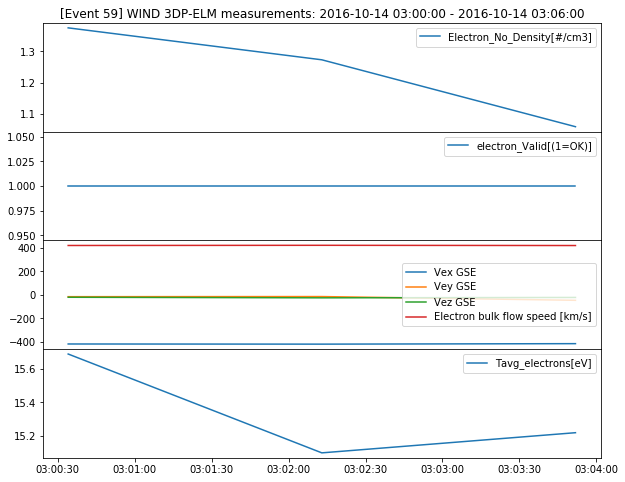

In [1918]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] WIND 3DP-ELM measurements: {t_start} - {t_end}')
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['DENSITY'],
    label=f"{data_3DP_ELM['DENSITY'].attrs['LABLAXIS']}[{data_3DP_ELM['DENSITY'].attrs['UNITS']}]"
)
ax = axes[1]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['VALID'],
    label=f"{data_3DP_ELM['VALID'].attrs['LABLAXIS']}[{data_3DP_ELM['VALID'].attrs['UNITS']}]"
)
ax = axes[2]
e_speed_3DP = np.linalg.norm(data_3DP_ELM['VELOCITY'],axis=1)
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,0],label='Vex GSE')
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,1],label='Vey GSE')
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'][:,2],label='Vez GSE')
ax.plot(data_3DP_ELM['Epoch'],e_speed_3DP,label=f"Electron bulk flow speed [{data_3DP_ELM['VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['AVGTEMP'],
    label=f"{data_3DP_ELM['AVGTEMP'].attrs['LABLAXIS']}[{data_3DP_ELM['AVGTEMP'].attrs['UNITS']}]"
)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])
plt.savefig('event_figures/event%02d-WIND-3DP-ELM.png'%i_event,dpi=100)
_ = 0;

In [1919]:
e_density_3DP_avg = np.mean(data_3DP_ELM['DENSITY'])
e_density_3DP_std = np.std(data_3DP_ELM['DENSITY'])
e_speed_3DP_avg = np.mean(e_speed_3DP)
e_speed_3DP_std = np.std(e_speed_3DP)
e_temperature_3DP_avg = np.mean(data_3DP_ELM['AVGTEMP'])

print(f"e_density_3DP_avg: {e_density_3DP_avg:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_density_3DP_std: {e_density_3DP_std:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_speed_3DP_avg: {e_speed_3DP_avg:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_speed_3DP_std: {e_speed_3DP_std:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_temperature_3DP_avg: {e_temperature_3DP_avg:.4} {data_3DP_ELM['AVGTEMP'].attrs['UNITS']}")

selected_events.loc[i_event,'electron_density_3DP'] = e_density_3DP_avg
selected_events.loc[i_event,'electron_speed_3DP'] = e_speed_3DP_avg
selected_events.loc[i_event,'electron_temperature_3DP'] = e_temperature_3DP_avg

e_density_3DP_avg: 1.236 #/cm3
e_density_3DP_std: 0.1313 #/cm3
e_speed_3DP_avg: 419.6 km/s
e_speed_3DP_std: 0.8366 km/s
e_temperature_3DP_avg: 15.34 eV


# WIND MFI

In [330]:
%%time
############################### 
# TODO
# check the PAD of each event.
###############################

variables_MFI = ['BF1','BF1LOG','BRMSF1','BGSM','BRMSGSM','BGSE','BGSEa','BRMSGSE','DIST','PGSM','PGSE','B3F1','B3F1LOG','B3RMSF1','B3GSM','B3RMSGSM','B3GSE','B3GSEa','B3RMSGSE','B1F1','B1F1LOG','B1RMSF1','B1GSM','B1RMSGSM','B1GSE','B1GSEa','B1RMSGSE','DIST1','P1GSM','P1GSE','DISTV','PGSMV','PGSEV','DIST1V','P1GSMV','P1GSEV']
status_MFI, data_MFI = cdas.get_data('WI_H0_MFI', variables_MFI, t_start_localize, t_end_localize)
print(data_MFI.keys())

0
dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 190 ms, sys: 38 ms, total: 228 ms
Wall time: 4.94 s


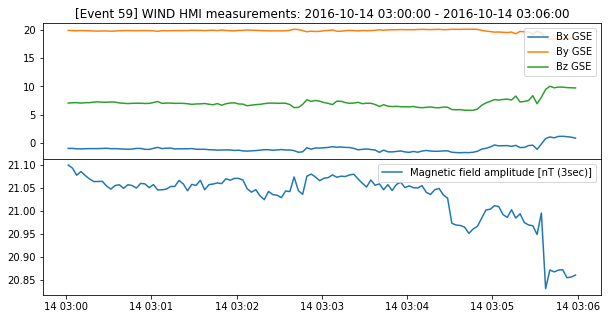

In [260]:
B_GSE_MFI = data_MFI['B3GSE']
B_GSE_MFI[B_GSE_MFI<-1e6] = np.nan

fig, axes = plt.subplots(2, figsize=(10, 5))
plt.subplots_adjust(hspace=0)

ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] WIND HMI measurements: {t_start} - {t_end}')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,0],label='Bx GSE')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,1],label='By GSE')
ax.plot(data_MFI['Epoch3'],data_MFI['B3GSE'][:,2],label='Bz GSE')
ax = axes[1]
magnetic_field_amp_MFI = np.linalg.norm(data_MFI['B3GSE'],axis=1)
ax.plot(data_MFI['Epoch3'],magnetic_field_amp_MFI,
        label=f"Magnetic field amplitude [{data_MFI['B3GSE'].attrs['UNITS']}]"
) # 3 denotes 3 sec cadence (without 3 denotes 1 min)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])
plt.savefig('event_figures/event%02d-WIND-HMI.png'%i_event,dpi=100)
_ = 0;

In [261]:
pos_GSE_WIND = data_MFI['PGSEV']
pos_GSE_WIND[pos_GSE_WIND<-1e6] = np.nan

x_GSE_HMI,y_GSE_HMI,z_GSE_HMI = np.nanmean(data_MFI['PGSEV'],axis=0)
selected_events.loc[i_event,'x_GSE_WIND']=x_GSE_HMI
selected_events.loc[i_event,'y_GSE_WIND']=y_GSE_HMI
selected_events.loc[i_event,'z_GSE_WIND']=z_GSE_HMI

B_total_HMI_avg = np.nanmean(magnetic_field_amp_MFI)
print(f"B_total_HMI_avg: {B_total_HMI_avg:.4} {data_MFI['B3GSE'].attrs['UNITS']}")
selected_events.loc[i_event,'B_total_WIND'] = B_total_HMI_avg

B_azimuthal_angle = np.mean(data_MFI['B3GSEa'][:,2])
print(f"B_azimuthal_angle: {B_azimuthal_angle:.4} deg")
selected_events.loc[i_event,'B_azimuthal_angle_WIND']  = B_azimuthal_angle
# Here we do not simply log the value of B. We also mind the trend of the B vector.

B_total_HMI_avg: 21.03 nT (3sec)
B_azimuthal_angle: 92.77 deg


# ACE SWE

In [26]:
i_event = -1
while i_event < 59:
    i_event += 1
    print(i_event)
    t_start, t_end = selected_events.iloc[i_event][:2]
    t_start_localize = t_start.tz_localize(tz='UTC')
    t_end_localize = t_end.tz_localize(tz='UTC')
    
    variables_SWE = ['Np','Vp','Tpr','alpha_ratio','V_GSE','V_RTN','V_GSM','SC_pos_GSE','SC_pos_GSM']
    status_SWE, data_SWE = cdas.get_data('AC_H0_SWE', variables_SWE, t_start_localize, t_end_localize)
    print(data_SWE.keys())
    # 1 min cadence
    # split here
    
    proton_density_SWE = data_SWE['Np']
    proton_density_SWE[proton_density_SWE<-1e5] = np.nan # will change the variable data_SWE['Np']
    proton_speed_SWE = data_SWE['Vp']
    proton_speed_SWE[proton_speed_SWE<-1e5] = np.nan
    proton_temperature_SWE = data_SWE['Tpr']
    proton_temperature_SWE[proton_temperature_SWE<-1e5] = np.nan
    proton_temperature_SWE_in_eV = proton_temperature_SWE / eV_to_Kelvin
    alpha_ratio_SWE = data_SWE['alpha_ratio']
    alpha_ratio_SWE[alpha_ratio_SWE<-1e5] = np.nan
    alpha_density_SWE = proton_density_SWE*alpha_ratio_SWE
    
    x_GSE_SWE,y_GSE_SWE,z_GSE_SWE = np.mean(data_SWE['SC_pos_GSE']/R_earth,axis=0)
    proton_density_SWE_avg = my_nanmean(proton_density_SWE)
    if proton_density_SWE_avg < 1e-6:
        selected_events.loc[i_event,'proton_density_SWE'] = np.nan
    else:
        selected_events.loc[i_event,'proton_density_SWE'] = proton_density_SWE_avg

    selected_events.loc[i_event,'proton_speed_SWE'] = my_nanmean(proton_speed_SWE)
    proton_temperature_SWE_in_eV_avg = my_nanmean(proton_temperature_SWE_in_eV)
    if proton_temperature_SWE_in_eV_avg < 1e-6:
        selected_events.loc[i_event,'proton_temperature_SWE'] = np.nan
    else:
        selected_events.loc[i_event,'proton_temperature_SWE'] = proton_temperature_SWE_in_eV_avg

    alpha_density_SWE_avg = my_nanmean(alpha_density_SWE)
    if alpha_density_SWE_avg < 1e-6:
        selected_events.loc[i_event,'alpha_density_SWE'] = np.nan
    else:
        selected_events.loc[i_event,'alpha_density_SWE'] = alpha_density_SWE_avg
    selected_events.loc[i_event,'x_GSE_ACE']=x_GSE_SWE
    selected_events.loc[i_event,'y_GSE_ACE']=y_GSE_SWE
    selected_events.loc[i_event,'z_GSE_ACE']=z_GSE_SWE

0
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
1
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
2
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
3
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
4
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
5
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'meta

dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
49
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
50
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
51
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
52
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4'])
53
dict_keys(['Epoch', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'V_RTN', 'V_GSM', 'SC_pos_GSE', 'SC_pos_GSM', 'metavar0', 'metavar1', 'm

In [1923]:
%%time
variables_SWE = ['Np','Vp','Tpr','alpha_ratio','V_GSE','V_RTN','V_GSM','SC_pos_GSE','SC_pos_GSM']
status_SWE, data_SWE = cdas.get_data('AC_H0_SWE', variables_SWE, t_start_localize, t_end_localize)
print(data_MFI.keys())
# 1 min cadence

dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 201 ms, sys: 7.78 ms, total: 209 ms
Wall time: 2.89 s


In [1924]:
proton_density_SWE = data_SWE['Np']
proton_density_SWE[proton_density_SWE<-1e5] = np.nan # will change the variable data_SWE['Np']
proton_speed_SWE = data_SWE['Vp']
proton_speed_SWE[proton_speed_SWE<-1e5] = np.nan
proton_temperature_SWE = data_SWE['Tpr']
proton_temperature_SWE[proton_temperature_SWE<-1e5] = np.nan
proton_temperature_SWE_in_eV = proton_temperature_SWE / eV_to_Kelvin
alpha_ratio_SWE = data_SWE['alpha_ratio']
alpha_ratio_SWE[alpha_ratio_SWE<-1e5] = np.nan
alpha_density_SWE = proton_density_SWE*alpha_ratio_SWE

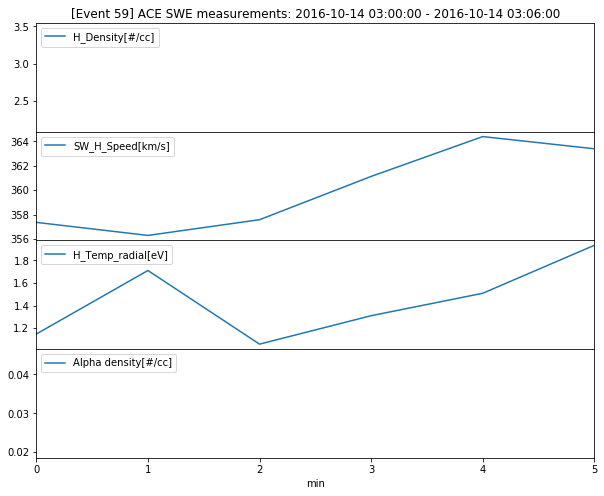

In [1925]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)

t_SWE = list(range(len(proton_density_SWE)))
ax = axes[0]
ax.set_title(f'[Event {i_event:02d}] ACE SWE measurements: {t_start} - {t_end}')
ax.plot(t_SWE,data_SWE['Np'],label=f"{data_SWE['Np'].attrs['LABLAXIS']}[{data_SWE['Np'].attrs['UNITS']}]")
ax = axes[1]
ax.plot(t_SWE,data_SWE['Vp'],label=f"{data_SWE['Vp'].attrs['LABLAXIS']}[{data_SWE['Vp'].attrs['UNITS']}]")
ax = axes[2]
ax.plot(t_SWE,proton_temperature_SWE_in_eV,label=f"{data_SWE['Tpr'].attrs['LABLAXIS']}[eV]")
ax = axes[3]
ax.plot(t_SWE,alpha_density_SWE,label='Alpha density[#/cc]')


for ax in axes:
    ax.legend(loc='best')
    ax.set_xlim(t_SWE[0],t_SWE[-1])
    if ax != axes[-1]:
        ax.set_xticks([])
axes[-1].set_xlabel('min')
plt.savefig('event_figures/event%02d-ACE-SWE.png'%i_event,dpi=100)
_ = 0;

In [1926]:
x_GSE_SWE,y_GSE_SWE,z_GSE_SWE = np.mean(data_SWE['SC_pos_GSE']/R_earth,axis=0)
proton_density_SWE_avg = my_nanmean(proton_density_SWE)
if proton_density_SWE_avg < 1e-6:
    selected_events.loc[i_event,'proton_density_SWE'] = np.nan
else:
    selected_events.loc[i_event,'proton_density_SWE'] = proton_density_SWE_avg
    
selected_events.loc[i_event,'proton_speed_SWE'] = my_nanmean(proton_speed_SWE)
proton_temperature_SWE_in_eV_avg = my_nanmean(proton_temperature_SWE_in_eV)
if proton_temperature_SWE_in_eV_avg < 1e-6:
    selected_events.loc[i_event,'proton_temperature_SWE'] = np.nan
else:
    selected_events.loc[i_event,'proton_temperature_SWE'] = proton_temperature_SWE_in_eV_avg

alpha_density_SWE_avg = my_nanmean(alpha_density_SWE)
if alpha_density_SWE_avg < 1e-6:
    selected_events.loc[i_event,'alpha_density_SWE'] = np.nan
else:
    selected_events.loc[i_event,'alpha_density_SWE'] = alpha_density_SWE_avg
selected_events.loc[i_event,'x_GSE_ACE']=x_GSE_SWE
selected_events.loc[i_event,'y_GSE_ACE']=y_GSE_SWE
selected_events.loc[i_event,'z_GSE_ACE']=z_GSE_SWE

# ACE SWI

In [23]:
# AC_H2_SWI: ACE/SWICS 1.1 Solar Wind 1-Hour Level 2 Data - G. Gloeckler (University of Maryland)
# [Available Time Range: 1998/02/04 00:09:16 - 2011/08/21 22:40:54]  Info  Metadata

# AC_H3_SW2: ACE/SWICS 2.0 Solar Wind 2-Hour Level 2 Data - G. Gloeckler (University of Maryland)
# [Available Time Range: 2012/06/01 00:40:44 - 2020/04/09 22:33:35]  Info  Metadata
i_event = -1
while i_event<59:
    i_event += 1
    print(i_event)
    t_start, t_end = selected_events.iloc[i_event][:2]
    t_start_localize = t_start.tz_localize(tz='UTC')
    t_end_localize = t_end.tz_localize(tz='UTC')

    seg = selected_events.iloc[i_event]
    print(seg[['alpha_density_SWI','C6toC5_ratio_SWI','O7toO6_ratio_SWI','Q_avg_Fe_SWI','FetoO']])

    t_AC_H2_SWI_end = datetime.datetime(2011,8,21,22,40,54)
    t_AC_H3_SW2_start = datetime.datetime(2012,6,1,0,40,44)
    if (t_end - t_AC_H2_SWI_end).value < 0:
        name_database = 'AC_H2_SWI' # 1hr cadence
        name_database = 'AC_H3_SWI' # 2hr cadence 
    elif (t_start - t_AC_H3_SW2_start).value > 0:
        name_database = 'AC_H3_SW2' # 2hr cadence
    else:
        raise ValueError
    # split here

    if name_database == 'AC_H2_SWI':
        if selected_events.duration[i_event]<60:
            # extend time interval
            t_middle = t_start + (t_start - t_end) / 2
            t_start_extended = t_middle - datetime.timedelta(minutes=30)
            t_end_extended = t_middle + datetime.timedelta(minutes=30)
            t_start_extended_localize = t_start_extended.tz_localize(tz='UTC')
            t_end_extended_localize = t_end_extended.tz_localize(tz='UTC')
        else:
            t_start_extended_localize = t_start_localize
            t_end_extended_localize = t_end_localize
    if name_database == 'AC_H3_SW2' or name_database == 'AC_H3_SWI':
        # extend time interval (if duration < 120 mins, which all events satisfy)
        t_middle = t_start + (t_start - t_end) / 2
        t_start_extended = t_middle - datetime.timedelta(minutes=60)
        t_end_extended = t_middle + datetime.timedelta(minutes=60)
        t_start_extended_localize = t_start_extended.tz_localize(tz='UTC')
        t_end_extended_localize = t_end_extended.tz_localize(tz='UTC')
    print(f"Event: {t_start} - {t_end}, using {name_database}")
    print(f"extended to: {t_start_extended} - {t_end_extended}")
    # split here

    #     %%time
    if name_database == 'AC_H2_SWI':
        variables_SWI = ['nHe2','nHe2_err','vHe2','vthHe2','He_qual','vC5','vthC5','C5_qual','vO6','vthO6','O6_qual','vFe10','vthFe10','Fe10_qual','C6to4','C6to4_err','C6to4_qual','C6to5','C6to5_err','C6to5_qual','O7to6','O7to6_err','O7to6_qual','avqC','avqC_err','avqC_qual','avqO','avqO_err','avqO_qual','avqMg','avqMg_err','avqMg_qual','avqSi','avqSi_err','avqSi_qual','avqFe','avqFe_err','avqFe_qual','FetoO','FetoO_err','FetoO_qual','SW_type']
        status_SWI, data_SWI = cdas.get_data(name_database, variables_SWI, t_start_extended_localize, t_end_extended_localize)

    if name_database == 'AC_H3_SW2':
        variables_SWI = ['vHe2','vthHe2','He_qual','C6to5','C6to5_err','C6to5_qual','O7to6','O7to6_err','O7to6_qual','O8to6','O8to6_err','O8to6_qual','avqFe','avqFe_err','avqFe_qual','FetoO','FetoO_err','FetoO_qual']
        status_SWI, data_SWI = cdas.get_data(name_database, variables_SWI, t_start_extended_localize, t_end_extended_localize)

    if name_database == 'AC_H3_SWI':
        variables_SWI = ['nHe2','nHe2_err','vHe2','vthHe2','He_qual','vC5','vthC5','C5_qual','vO6','vthO6','O6_qual','vFe10','vthFe10','Fe10_qual','C6to4','C6to4_err','C6to4_qual','C6to5','C6to5_err','C6to5_qual','O7to6','O7to6_err','O7to6_qual','avqC','avqC_err','avqC_qual','avqO','avqO_err','avqO_qual','avqMg','avqMg_err','avqMg_qual','avqSi','avqSi_err','avqSi_qual','avqFe','avqFe_err','avqFe_qual','HetoO','HetoO_err','HetoO_qual','CtoO','CtoO_err','CtoO_qual','NetoO','NetoO_err','NetoO_qual','MgtoO','MgtoO_err','MgtoO_qual','SitoO','SitoO_err','SitoO_qual','FetoO','FetoO_err','FetoO_qual','SW_type']
        status_SWI, data_SWI = cdas.get_data(name_database, variables_SWI, t_start_extended_localize, t_end_extended_localize)

    # print(data_SWI.keys())
    # split here

    # quality: 0 >> good quality
    if name_database == 'AC_H2_SWI' or name_database == 'AC_H3_SWI': # 'AC_H3_SW2' does not offer.
        print(data_SWI['nHe2'].attrs['LABLAXIS'],data_SWI['nHe2'],data_SWI['nHe2'].attrs['UNITS'])
        print('SW_type:',data_SWI['SW_type'])
        # 0:streamer 1:coronal hole 2:CME 3:unidentified 
    print(data_SWI['He_qual'].attrs['LABLAXIS'],data_SWI['He_qual'])
    print(data_SWI['C6to5'].attrs['LABLAXIS'],data_SWI['C6to5'],data_SWI['C6to5_err'].attrs['LABLAXIS'],data_SWI['C6to5_err'])
    print(data_SWI['O7to6'].attrs['LABLAXIS'],data_SWI['O7to6'],data_SWI['O7to6_err'].attrs['LABLAXIS'],data_SWI['O7to6_err'])
    print(data_SWI['avqFe'].attrs['LABLAXIS'],data_SWI['avqFe'],data_SWI['avqFe_err'].attrs['LABLAXIS'],data_SWI['avqFe_err'])
    print(data_SWI['FetoO'].attrs['LABLAXIS'],data_SWI['FetoO'],data_SWI['FetoO_err'].attrs['LABLAXIS'],data_SWI['FetoO_err'])
    # split here

    if name_database == 'AC_H2_SWI' or name_database == 'AC_H3_SWI': # 'AC_H3_SW2' does not offer.
        selected_events.loc[i_event,'SW_type_SWI'] = data_SWI['SW_type']
        alpha_density_SWI = (data_SWI['He_qual'] == 0)*data_SWI['nHe2']
        alpha_density_SWI[alpha_density_SWI<1e-10] = np.nan
        if np.logical_not(np.isnan(alpha_density_SWI)).sum()>0: 
            alpha_density_SWI_avg = my_nanmean(alpha_density_SWI)
        else:
            alpha_density_SWI_avg = np.nan
        selected_events.loc[i_event,'alpha_density_SWI'] = alpha_density_SWI_avg
    if name_database == 'AC_H3_SW2':
        selected_events.loc[i_event,'SW_type_SWI'] = np.nan
        selected_events.loc[i_event,'alpha_density_SWI'] = np.nan

    C6toC5_ratio_SWI = data_SWI['C6to5']
    C6toC5_ratio_SWI[C6toC5_ratio_SWI<-1e6] = np.nan
    C6toC5_ratio_SWI_avg = my_nanmean(C6toC5_ratio_SWI)
    if C6toC5_ratio_SWI_avg < 1e-6:
        selected_events.loc[i_event,'C6toC5_ratio_SWI'] = np.nan
    else:
        selected_events.loc[i_event,'C6toC5_ratio_SWI'] = C6toC5_ratio_SWI_avg

    O7toO6_ratio_SWI = data_SWI['O7to6']
    O7toO6_ratio_SWI[O7toO6_ratio_SWI<-1e6] = np.nan
    O7toO6_ratio_SWI_avg = my_nanmean(O7toO6_ratio_SWI)
    if O7toO6_ratio_SWI_avg < 1e-6:
        selected_events.loc[i_event,'O7toO6_ratio_SWI'] = np.nan
    else:
        selected_events.loc[i_event,'O7toO6_ratio_SWI'] = O7toO6_ratio_SWI_avg

    Q_avg_Fe_SWI = data_SWI['avqFe']
    Q_avg_Fe_SWI[Q_avg_Fe_SWI<-1e6] = np.nan
    Q_avg_Fe_SWI_avg = my_nanmean(Q_avg_Fe_SWI)
    if Q_avg_Fe_SWI_avg < 1e-6:
        selected_events.loc[i_event,'Q_avg_Fe_SWI'] = np.nan
    else:
        selected_events.loc[i_event,'Q_avg_Fe_SWI'] = Q_avg_Fe_SWI_avg

    Fe_to_O_SWI = data_SWI['FetoO']
    Fe_to_O_SWI[Fe_to_O_SWI<-1e6] = np.nan
    Fe_to_O_SWI_avg = my_nanmean(Fe_to_O_SWI)
    if Fe_to_O_SWI_avg < 1e-6:
        selected_events.loc[i_event,'FetoO'] = np.nan
    else:
        selected_events.loc[i_event,'FetoO'] = Fe_to_O_SWI_avg

    # split here 

    seg = selected_events.iloc[i_event]
    print(seg[['alpha_density_SWI','C6toC5_ratio_SWI','O7toO6_ratio_SWI','Q_avg_Fe_SWI','FetoO']])

0
alpha_density_SWI    0.010341
C6toC5_ratio_SWI          NaN
O7toO6_ratio_SWI      0.25949
Q_avg_Fe_SWI           13.932
FetoO                     NaN
Name: 0, dtype: object
Event: 1999-05-11 18:25:00 - 1999-05-11 18:57:00, using AC_H3_SWI
extended to: 1999-05-11 17:09:00 - 1999-05-11 19:09:00
He++_density [0.010341] #/cm^3
SW_type: [0]
QF_He [0]
C+6/C+5_Ratio [-1.e+31] C+6/C+5_Ratio_Err [-1.e+31]
O+7/O+6_Ratio [0.25949] O+7/O+6_Ratio_Err [0.078727]
<Q>_Fe [13.932] <Q>_Fe_Err [5.6777]
Fe/O_Ratio [-1.e+31] Fe/O_err [-1.e+31]
alpha_density_SWI    0.010341
C6toC5_ratio_SWI          NaN
O7toO6_ratio_SWI      0.25949
Q_avg_Fe_SWI           13.932
FetoO                     NaN
Name: 0, dtype: object
1
alpha_density_SWI    0.00069446
C6toC5_ratio_SWI            NaN
O7toO6_ratio_SWI            NaN
Q_avg_Fe_SWI                NaN
FetoO                       NaN
Name: 1, dtype: object
Event: 2000-03-29 04:45:00 - 2000-03-29 05:12:00, using AC_H3_SWI
extended to: 2000-03-29 03:31:30 - 2000-03-29

He++_density [0.00094744] #/cm^3
SW_type: [3]
QF_He [0]
C+6/C+5_Ratio [-1.e+31] C+6/C+5_Ratio_Err [-1.e+31]
O+7/O+6_Ratio [-1.e+31] O+7/O+6_Ratio_Err [-1.e+31]
<Q>_Fe [-1.e+31] <Q>_Fe_Err [-1.e+31]
Fe/O_Ratio [-1.e+31] Fe/O_err [-1.e+31]
alpha_density_SWI    0.00094744
C6toC5_ratio_SWI            NaN
O7toO6_ratio_SWI            NaN
Q_avg_Fe_SWI                NaN
FetoO                       NaN
Name: 12, dtype: object
13
alpha_density_SWI    0.00090856
C6toC5_ratio_SWI            NaN
O7toO6_ratio_SWI            NaN
Q_avg_Fe_SWI                NaN
FetoO                       NaN
Name: 13, dtype: object
Event: 2002-05-24 22:15:00 - 2002-05-24 22:36:00, using AC_H3_SWI
extended to: 2002-05-24 21:04:30 - 2002-05-24 23:04:30
He++_density [0.00090856] #/cm^3
SW_type: [0]
QF_He [0]
C+6/C+5_Ratio [-1.e+31] C+6/C+5_Ratio_Err [-1.e+31]
O+7/O+6_Ratio [-1.e+31] O+7/O+6_Ratio_Err [-1.e+31]
<Q>_Fe [-1.e+31] <Q>_Fe_Err [-1.e+31]
Fe/O_Ratio [-1.e+31] Fe/O_err [-1.e+31]
alpha_density_SWI    0.00090856


He++_density [0.00097648] #/cm^3
SW_type: [2]
QF_He [0]
C+6/C+5_Ratio [-1.e+31] C+6/C+5_Ratio_Err [-1.e+31]
O+7/O+6_Ratio [0.31726] O+7/O+6_Ratio_Err [0.097705]
<Q>_Fe [11.] <Q>_Fe_Err [3.6121]
Fe/O_Ratio [0.1596] Fe/O_err [0.15271]
alpha_density_SWI    0.00097648
C6toC5_ratio_SWI            NaN
O7toO6_ratio_SWI        0.31726
Q_avg_Fe_SWI                 11
FetoO                    0.1596
Name: 24, dtype: object
25
alpha_density_SWI    0.11069
C6toC5_ratio_SWI      2.6505
O7toO6_ratio_SWI     0.48022
Q_avg_Fe_SWI          10.678
FetoO                0.14224
Name: 25, dtype: object
Event: 2003-10-02 05:20:00 - 2003-10-02 05:30:00, using AC_H3_SWI
extended to: 2003-10-02 04:15:00 - 2003-10-02 06:15:00
He++_density [0.11069] #/cm^3
SW_type: [2]
QF_He [0]
C+6/C+5_Ratio [2.6505] C+6/C+5_Ratio_Err [0.18168]
O+7/O+6_Ratio [0.48022] O+7/O+6_Ratio_Err [0.020841]
<Q>_Fe [10.678] <Q>_Fe_Err [0.21998]
Fe/O_Ratio [0.14224] Fe/O_err [0.0090442]
alpha_density_SWI    0.11069
C6toC5_ratio_SWI      2.6

He++_density [0.00093454] #/cm^3
SW_type: [0]
QF_He [0]
C+6/C+5_Ratio [-1.e+31] C+6/C+5_Ratio_Err [-1.e+31]
O+7/O+6_Ratio [0.48579] O+7/O+6_Ratio_Err [0.14505]
<Q>_Fe [12.] <Q>_Fe_Err [13.169]
Fe/O_Ratio [-1.e+31] Fe/O_err [-1.e+31]
alpha_density_SWI    0.00093454
C6toC5_ratio_SWI            NaN
O7toO6_ratio_SWI        0.48579
Q_avg_Fe_SWI                 12
FetoO                       NaN
Name: 36, dtype: object
37
alpha_density_SWI    0.0007285
C6toC5_ratio_SWI           NaN
O7toO6_ratio_SWI           NaN
Q_avg_Fe_SWI               NaN
FetoO                      NaN
Name: 37, dtype: object
Event: 2004-09-13 08:59:00 - 2004-09-13 09:04:00, using AC_H3_SWI
extended to: 2004-09-13 07:56:30 - 2004-09-13 09:56:30
He++_density [0.0007285] #/cm^3
SW_type: [2]
QF_He [0]
C+6/C+5_Ratio [-1.e+31] C+6/C+5_Ratio_Err [-1.e+31]
O+7/O+6_Ratio [-1.e+31] O+7/O+6_Ratio_Err [-1.e+31]
<Q>_Fe [-1.e+31] <Q>_Fe_Err [-1.e+31]
Fe/O_Ratio [-1.e+31] Fe/O_err [-1.e+31]
alpha_density_SWI    0.0007285
C6toC5_ratio

QF_He [0]
C+6/C+5_Ratio [1.409] C+6/C+5_Ratio_Err [1.4817]
O+7/O+6_Ratio [0.54176] O+7/O+6_Ratio_Err [1.3362]
<Q>_Fe [10.588] <Q>_Fe_Err [0.19835]
Fe/O_Ratio [0.34806] Fe/O_err [1.4418]
alpha_density_SWI        NaN
C6toC5_ratio_SWI       1.409
O7toO6_ratio_SWI     0.54176
Q_avg_Fe_SWI          10.588
FetoO                0.34806
Name: 48, dtype: object
49
alpha_density_SWI        NaN
C6toC5_ratio_SWI       1.409
O7toO6_ratio_SWI     0.54176
Q_avg_Fe_SWI          10.588
FetoO                0.34806
Name: 49, dtype: object
Event: 2013-01-18 00:33:00 - 2013-01-18 00:43:00, using AC_H3_SW2
extended to: 2013-01-17 23:28:00 - 2013-01-18 01:28:00
QF_He [0]
C+6/C+5_Ratio [1.409] C+6/C+5_Ratio_Err [1.4817]
O+7/O+6_Ratio [0.54176] O+7/O+6_Ratio_Err [1.3362]
<Q>_Fe [10.588] <Q>_Fe_Err [0.19835]
Fe/O_Ratio [0.34806] Fe/O_err [1.4418]
alpha_density_SWI        NaN
C6toC5_ratio_SWI       1.409
O7toO6_ratio_SWI     0.54176
Q_avg_Fe_SWI          10.588
FetoO                0.34806
Name: 49, dtype: obje

In [22]:
name_database

'AC_H3_SW2'

# ACE MFI

In [1932]:
%%time
variables_ACEMFI = ['Magnitude','BGSEc','BGSM','SC_pos_GSE','SC_pos_GSM']
status_ACEMFI, data_ACEMFI = cdas.get_data('AC_H1_MFI', variables_ACEMFI, t_start_localize, t_end_localize)
print(data_ACEMFI.keys())

dict_keys(['Epoch', 'Magnitude', 'BGSEc', 'BGSM', 'SC_pos_GSE', 'SC_pos_GSM', 'cartesian', 'metavar0', 'metavar1', 'metavar2', 'metavar3'])
CPU times: user 42.9 ms, sys: 4.11 ms, total: 47 ms
Wall time: 2.49 s


Text(0.5, 1.0, '[Event 59] ACE HMI measurements: 2016-10-14 03:00:00 - 2016-10-14 03:06:00')

[]

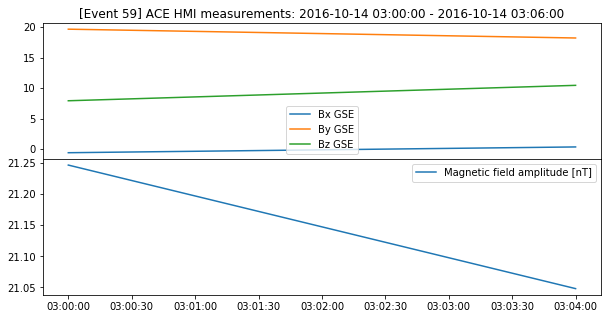

In [1933]:
if np.shape(data_ACEMFI['BGSEc']) ==(3,):
    print(data_ACEMFI['BGSEc'])
else:
    fig, axes = plt.subplots(2, figsize=(10, 5))
    plt.subplots_adjust(hspace=0)

    ax = axes[0]
    ax.set_title(f'[Event {i_event:02d}] ACE HMI measurements: {t_start} - {t_end}')
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['BGSEc'][:,0],label='Bx GSE')
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['BGSEc'][:,1],label='By GSE')
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['BGSEc'][:,2],label='Bz GSE')
    ax = axes[1]
    ax.plot(data_ACEMFI['Epoch'],data_ACEMFI['Magnitude'],
            label=f"Magnetic field amplitude [{data_ACEMFI['Magnitude'].attrs['UNITS']}]"
    ) 

    for ax in axes:
        ax.legend(loc='best')
        if ax != axes[-1]:
            ax.set_xticks([])
    plt.savefig('event_figures/event%02d-ACE-HMI.png'%i_event,dpi=100)
_ = 0;

In [1934]:
B_total_ACEHMI_avg = np.mean(data_ACEMFI['Magnitude'])
print(f"B_total_ACEHMI_avg: {B_total_ACEHMI_avg:.4} [{data_ACEMFI['Magnitude'].attrs['UNITS']}]")
selected_events.loc[i_event,'B_total_ACE'] = B_total_ACEHMI_avg

# Here we do not simply log the value of B. We also mind the trend of the B vector.

B_total_ACEHMI_avg: 21.15 [nT]


In [1935]:
selected_events.iloc[i_event]

start                       2016-10-14 03:00:00
end                         2016-10-14 03:06:00
duration                                      7
num_of_log                                    7
fill_rate                                     1
proton_density_3DP                      1.70424
proton_speed_3DP                        365.046
proton_temperature_3DP                  6.44003
alpha_density_3DP                     0.0121522
electron_density_3DP                    1.23632
electron_speed_3DP                      419.593
electron_temperature_3DP                15.3351
x_GSE_WIND                              245.633
y_GSE_WIND                             -73.6046
z_GSE_WIND                              13.9413
x_GSE_ACE                               230.249
y_GSE_ACE                               39.9287
z_GSE_ACE                              -10.0099
proton_density_SWE                      0.93925
proton_speed_SWE                        360.027
proton_temperature_SWE                  